In [1]:
#Importaciones
from loadsets import load_sets
from utiles import graficar_sets


#Cargamos los sets
sets = load_sets()

[it_train, it_validation, it_test, it_mtest] = sets

#Graficamos los sets
#graficar_sets(sets)


Train:
Found 1726 images belonging to 10 classes.
Validation:
Found 200 images belonging to 10 classes.
Test:
Found 136 images belonging to 10 classes.
Meta-test:
Found 10 images belonging to 10 classes.


In [2]:
from modelo_sign02 import create_model_sign02
from tensorflow.keras.utils import plot_model

models = list()

models.append(
    create_model_sign02(
        #Filtros para N capas convolucionales (en orden)
        filters = [96, 128, 160, 192],
        kernel_sizes = [7, 5, 3, 3],
        activations = ['relu', 'relu', 'relu', 'relu'],
        maxpool = [1,1,1,0],

        #Capas adicionales
        DenseDims = [128, 512],
        DenseActivations = ['relu', 'relu'],
        DropoutRates = [0.4, 0.2] 
    )
)



#model.summary()

#plot_model(model, to_file='s01v01.png', show_shapes=True, show_layer_names=True)



 --------- VARIANTE  1 ---------
learning_rate:  0.0001
Restoring model weights from the end of the best epoch: 34.
Epoch 00039: early stopping


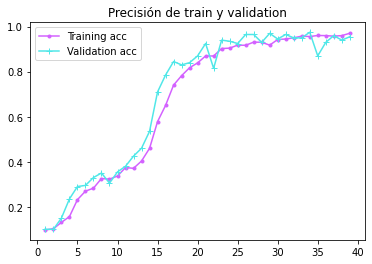

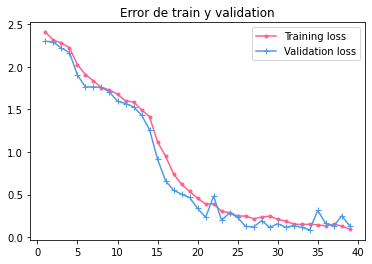


--TEST--
Test accuracy: 96.3%
Test acc:  0.9632353186607361
Test loss:  0.15198899805545807

--METATEST--
Meta-Test accuracy: 50.0%
Meta-Test acc: 0.5
Meta-Test loss: 1.4728970527648926


 --------- VARIANTE  2 ---------
learning_rate:  5e-05
Restoring model weights from the end of the best epoch: 11.
Epoch 00016: early stopping


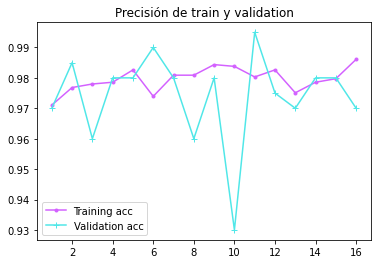

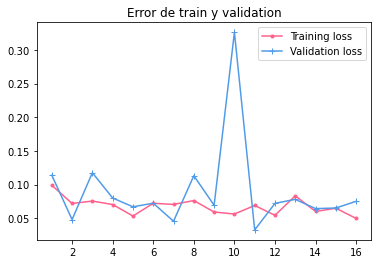


--TEST--
Test accuracy: 96.3%
Test acc:  0.9632353186607361
Test loss:  0.09942754358053207

--METATEST--
Meta-Test accuracy: 50.0%
Meta-Test acc: 0.5
Meta-Test loss: 2.1874561309814453


 --------- VARIANTE  3 ---------
learning_rate:  1.25e-05
Restoring model weights from the end of the best epoch: 2.
Epoch 00007: early stopping


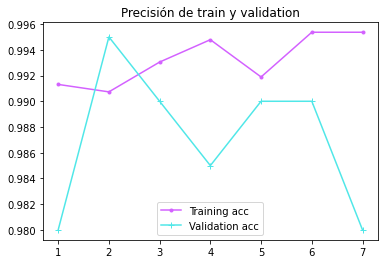

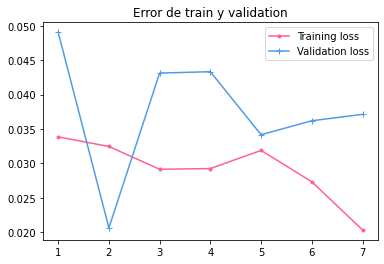


--TEST--
Test accuracy: 96.3%
Test acc:  0.9632353186607361
Test loss:  0.12451232224702835

--METATEST--
Meta-Test accuracy: 40.0%
Meta-Test acc: 0.4000000059604645
Meta-Test loss: 2.9416661262512207


 --------- VARIANTE  4 ---------
learning_rate:  1.5625e-06
Restoring model weights from the end of the best epoch: 1.
Epoch 00006: early stopping


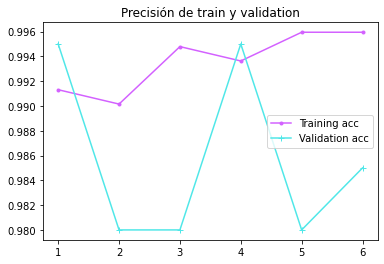

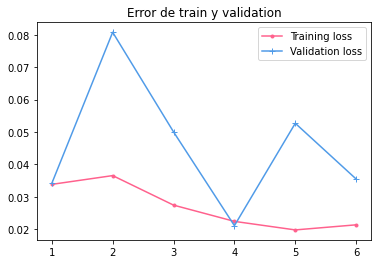


--TEST--
Test accuracy: 97.8%
Test acc:  0.9779411554336548
Test loss:  0.1049891859292984

--METATEST--
Meta-Test accuracy: 40.0%
Meta-Test acc: 0.4000000059604645
Meta-Test loss: 2.5917000770568848


 --------- VARIANTE  5 ---------
learning_rate:  9.765625e-08
Restoring model weights from the end of the best epoch: 2.
Epoch 00007: early stopping


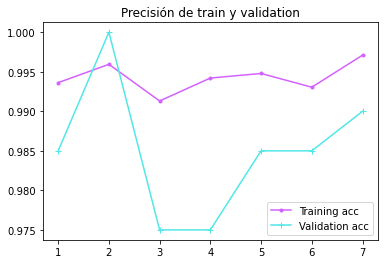

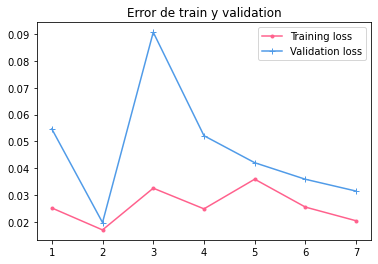


--TEST--
Test accuracy: 97.8%
Test acc:  0.9779411554336548
Test loss:  0.10362926870584488

--METATEST--
Meta-Test accuracy: 40.0%
Meta-Test acc: 0.4000000059604645
Meta-Test loss: 2.5816617012023926


 --------- VARIANTE  6 ---------
learning_rate:  3.0517578125e-09
Restoring model weights from the end of the best epoch: 2.
Epoch 00007: early stopping


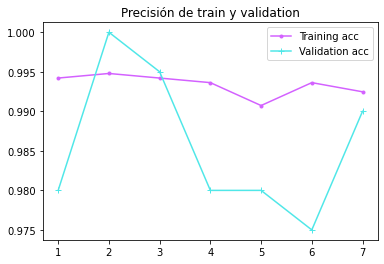

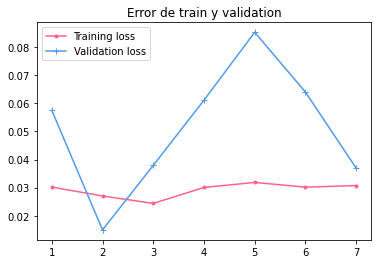


--TEST--
Test accuracy: 97.8%
Test acc:  0.9779411554336548
Test loss:  0.10360613465309143

--METATEST--
Meta-Test accuracy: 40.0%
Meta-Test acc: 0.4000000059604645
Meta-Test loss: 2.5812690258026123


 --------- VARIANTE  7 ---------
learning_rate:  4.76837158203125e-11
Restoring model weights from the end of the best epoch: 9.
Epoch 00014: early stopping


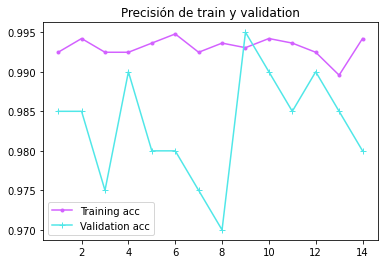

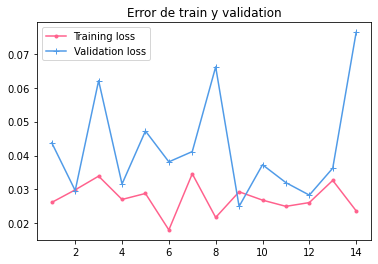


--TEST--
Test accuracy: 97.8%
Test acc:  0.9779411554336548
Test loss:  0.10360607504844666

--METATEST--
Meta-Test accuracy: 40.0%
Meta-Test acc: 0.4000000059604645
Meta-Test loss: 2.581249475479126


 --------- VARIANTE  8 ---------
learning_rate:  3.725290298461914e-13
Restoring model weights from the end of the best epoch: 5.
Epoch 00010: early stopping


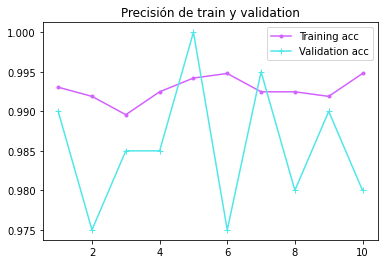

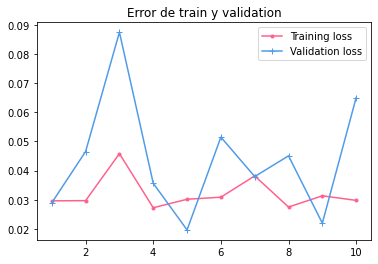


--TEST--
Test accuracy: 97.8%
Test acc:  0.9779411554336548
Test loss:  0.10360608249902725

--METATEST--
Meta-Test accuracy: 40.0%
Meta-Test acc: 0.4000000059604645
Meta-Test loss: 2.5812501907348633


 --------- VARIANTE  9 ---------
learning_rate:  1.4551915228366853e-15
Restoring model weights from the end of the best epoch: 2.
Epoch 00007: early stopping


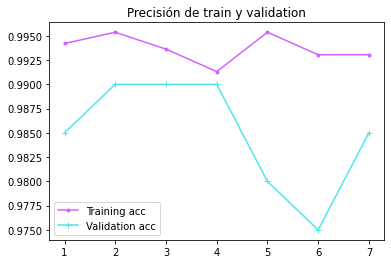

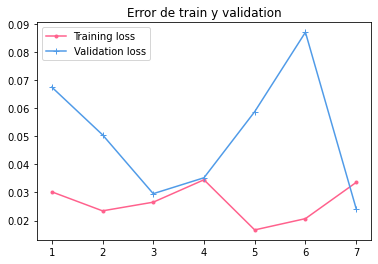


--TEST--
Test accuracy: 97.8%
Test acc:  0.9779411554336548
Test loss:  0.10360608994960785

--METATEST--
Meta-Test accuracy: 40.0%
Meta-Test acc: 0.4000000059604645
Meta-Test loss: 2.5812501907348633


 --------- VARIANTE  10 ---------
learning_rate:  2.842170943040401e-18
Restoring model weights from the end of the best epoch: 2.
Epoch 00007: early stopping


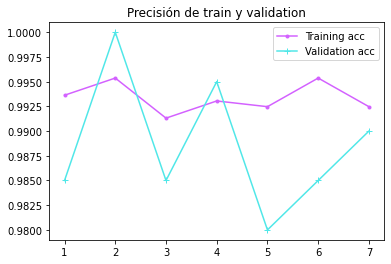

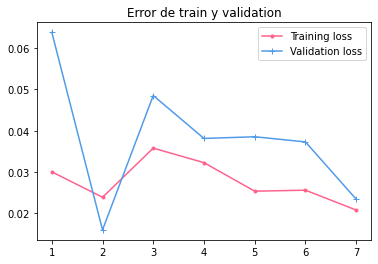


--TEST--
Test accuracy: 97.8%
Test acc:  0.9779411554336548
Test loss:  0.10360608249902725

--METATEST--
Meta-Test accuracy: 40.0%
Meta-Test acc: 0.4000000059604645
Meta-Test loss: 2.581249952316284


In [3]:
from tensorflow.keras.optimizers import Adam
from utiles import draw_history
from tensorflow.keras.callbacks import EarlyStopping

########################################### COMP & FIT ###########################################

histories = list()

#Compilación y Entrenamiento
learning_rate = 0.0001
batch_size = 128
epochs = 300

index = 0
for model in models:

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(
        loss='categorical_crossentropy',
        optimizer= optimizer,
        metrics=['accuracy']
    )

    for i in range(10):

        index += 1
        print("\n\n --------- VARIANTE ", index, "---------")

        learning_rate = learning_rate / (2 ** i)
        print ("learning_rate: ", learning_rate)
        optimizer.lr.assign(learning_rate)

        earlys = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max', restore_best_weights=True)


        history = model.fit(
            it_train,
            epochs=epochs, 
            batch_size=batch_size,
            shuffle=True, 
            validation_data=it_validation, 
            verbose=0,
            callbacks=[earlys] 
        )    

        loss_test, acc_test = model.evaluate(
                    it_test,
                    verbose=0
            ) 

        loss_mtest, acc_mtest = model.evaluate(
                    it_mtest,
                    verbose=0
                    ) 
            
        
        draw_history(history)

        print("\n--TEST--")  
        print("Test accuracy: %.1f%%" % (100.0 * acc_test))  
        print("Test acc: ", acc_test)  
        print("Test loss: ", loss_test)  
        print("\n--METATEST--")  
        print("Meta-Test accuracy: %.1f%%" % (100.0 * acc_mtest))  
        print("Meta-Test acc:", acc_mtest)  
        print("Meta-Test loss:", loss_mtest)  
